# Hands-on 3: QRoutines




In this jupyter notebook the goal is to learn how to create QRoutines. We will first build a circuit of a 5-qubit QFT gate by gate. After we will create a QRoutine for a generalized QFT. Finally you will learn how to use already implemented functions of the QLM, like the QFT.

## Creation of a 5-qubit QFT

Let us continue with a circuit that is just a little bit more complicated than the EPR pair.
<img src="qft5.PNG">
First, we need to import relevant objects from the python AQASM module:

In [1]:
#Import AQASM 
from qat.lang.AQASM import *

And we need the math library for $\pi$:

In [2]:
#Import the math library for pi
import math

Then, we can declare a new object ``Program``. Let us give it an explicit name:

In [3]:
#Create a program
QFT_prog1 = Program()

To create our QFT on 5 qubits, we need to allocate those qubits. Please allocate a register of 5 qubits in the following cell:

In [4]:
#Allocate qubits
qubits = QFT_prog1.qalloc(5)

Now, we can access our qubits using the register "qubits".

Registers behave like python list/arrays.

Here our qubits will be refered to using qubits[0] to qubits[4].

To create our QFT, we implement the appropriate gates.

To do we need to:

+ use Hadamard gates (H)
+ use Phase shift gates (PH) with the good angle each time
+ control the Phase shift gates with the good qubits

You can control any gate with the function ctrl(). When applying a controlled gate, the qubit that controls the gate comes first.

In [5]:
#Apply gates
#to use the constant pi, please use math.pi
QFT_prog1.apply(H, qubits[0])
QFT_prog1.apply(PH(math.pi/2).ctrl(), qubits[1], qubits[0])
QFT_prog1.apply(PH(math.pi/4).ctrl(), qubits[2], qubits[0])
QFT_prog1.apply(PH(math.pi/8).ctrl(), qubits[3], qubits[0])
QFT_prog1.apply(PH(math.pi/16).ctrl(), qubits[4], qubits[0])
QFT_prog1.apply(H, qubits[1])
QFT_prog1.apply(PH(math.pi/2).ctrl(), qubits[2], qubits[1])
QFT_prog1.apply(PH(math.pi/4).ctrl(), qubits[3], qubits[1])
QFT_prog1.apply(PH(math.pi/8).ctrl(), qubits[4], qubits[1])
QFT_prog1.apply(H, qubits[2])
QFT_prog1.apply(PH(math.pi/2).ctrl(), qubits[3], qubits[2])
QFT_prog1.apply(PH(math.pi/4).ctrl(), qubits[4], qubits[2])
QFT_prog1.apply(H, qubits[3])
QFT_prog1.apply(PH(math.pi/2).ctrl(), qubits[4], qubits[3])
QFT_prog1.apply(H, qubits[4])

The corresponding circuit object can be extracted directly from the Program object as follows:

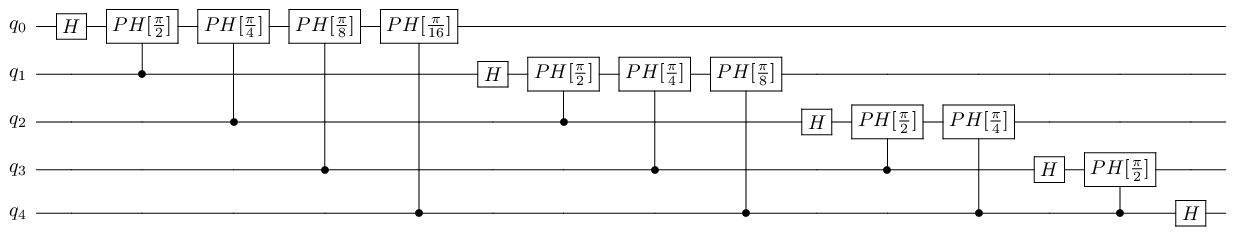

In [6]:
#Create the circuit
circuit = QFT_prog1.to_circ()

#Display the circuit
%qatdisplay circuit

Now that we have a proper circuit, we can simulate it.

In [7]:
 #Let us import some qpu connected to a classical linear algebra simulator
from qat.qpus import LinAlg
qpu = LinAlg()

#Create a job from the circuit
job = circuit.to_job()

#Submit the job
results = qpu.submit(job)

#Print the results
for sample in results:
    print("State",sample.state,"with amplitude",sample.amplitude)

State |00000> with amplitude (0.1767766952966368+0j)
State |00001> with amplitude (0.1767766952966368+0j)
State |00010> with amplitude (0.1767766952966368+0j)
State |00011> with amplitude (0.1767766952966368+0j)
State |00100> with amplitude (0.1767766952966368+0j)
State |00101> with amplitude (0.1767766952966368+0j)
State |00110> with amplitude (0.1767766952966368+0j)
State |00111> with amplitude (0.1767766952966368+0j)
State |01000> with amplitude (0.1767766952966368+0j)
State |01001> with amplitude (0.1767766952966368+0j)
State |01010> with amplitude (0.1767766952966368+0j)
State |01011> with amplitude (0.1767766952966368+0j)
State |01100> with amplitude (0.1767766952966368+0j)
State |01101> with amplitude (0.1767766952966368+0j)
State |01110> with amplitude (0.1767766952966368+0j)
State |01111> with amplitude (0.1767766952966368+0j)
State |10000> with amplitude (0.1767766952966368+0j)
State |10001> with amplitude (0.1767766952966368+0j)
State |10010> with amplitude (0.17677669529663

The initial state of all qubits is |0>. Applying a QFT on a register in state |00..00> produces a superposition of all possible states.

## myQFT QRoutine

It is possible to create quantum functions that we call QRoutines.

Here we are going to create a QRoutine for a generalized QFT so we can apply it as any Gate.

Moreover we will be able to call our QFT with any number of qubits. Be carefull since the memory needed grows exponentially with the number of qubits.

The following cell describes a way to implement the generalized QFT:
+ we define our function's name and the parameter we will need
+ we define our QRoutine's object
+ we apply the gates we need to the QRoutine

As you can see, gates on a QRoutine only need indices.

In [8]:
#Create the QFT QRoutine 
def my_QFT(n):
    my_qftn = QRoutine()
    
    for i in range(n):
        my_qftn.apply(H,i)
        for j in range(i+1,n):
            angle = math.pi / pow(2,j - i)
            my_qftn.apply(PH(angle).ctrl(),j,i)
    return my_qftn

Now that we have our generalized QFT defined as my_QFT we can call it inside a program as a gate.

The following cell creates a program that call my_QFT on 5 qubits.

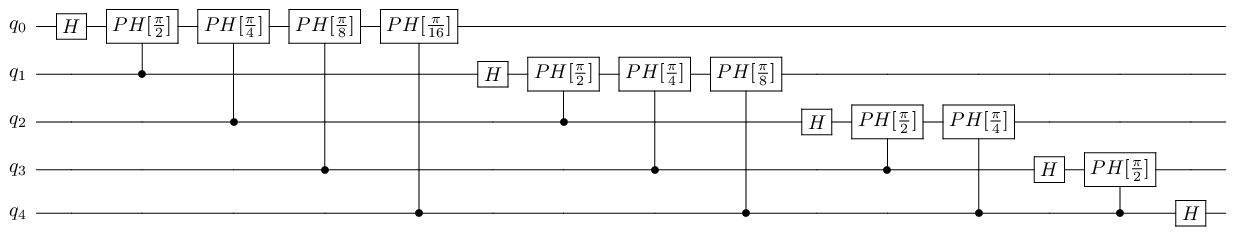

In [9]:
#Create the program
QFT_prog2 = Program()

#Define the number of qubits
nbqubits = 5

#Allocate qubits
qubits = QFT_prog2.qalloc(nbqubits)

#Applying gates
QFT_prog2.apply(my_QFT(nbqubits),qubits)

#Create circuit
circuit = QFT_prog2.to_circ()

#Display circuit
%qatdisplay circuit

You can simulate the circuit by using the following cell:

In [10]:
 #Let us import some qpu connected to a classical linear algebra simulator
from qat.qpus import LinAlg
qpu = LinAlg()

#Create the associated job of a circuit
job = circuit.to_job()

#Submit the job and get the results
results = qpu.submit(job)

#Print the results
for sample in results:
    print("State",sample.state,"with amplitude",sample.amplitude,"with probability",sample.probability)

State |00000> with amplitude (0.1767766952966368+0j) with probability 0.031249999999999976
State |00001> with amplitude (0.1767766952966368+0j) with probability 0.031249999999999976
State |00010> with amplitude (0.1767766952966368+0j) with probability 0.031249999999999976
State |00011> with amplitude (0.1767766952966368+0j) with probability 0.031249999999999976
State |00100> with amplitude (0.1767766952966368+0j) with probability 0.031249999999999976
State |00101> with amplitude (0.1767766952966368+0j) with probability 0.031249999999999976
State |00110> with amplitude (0.1767766952966368+0j) with probability 0.031249999999999976
State |00111> with amplitude (0.1767766952966368+0j) with probability 0.031249999999999976
State |01000> with amplitude (0.1767766952966368+0j) with probability 0.031249999999999976
State |01001> with amplitude (0.1767766952966368+0j) with probability 0.031249999999999976
State |01010> with amplitude (0.1767766952966368+0j) with probability 0.031249999999999976

This section was meant to show you how to use QRoutines.

## QLM function for QFT

Some QRoutines are already implemented like the QFT. Let's have a look at how to call them.

First we need to import the qftarith library:

In [11]:
#Import AQASM 
from qat.lang.AQASM import *

#Import the QFT function of the QLM
from qat.lang.AQASM.qftarith import QFT

Once it is done we call the QFT function as a Gate. Please complete the following cell with the right name to apply the QFT:

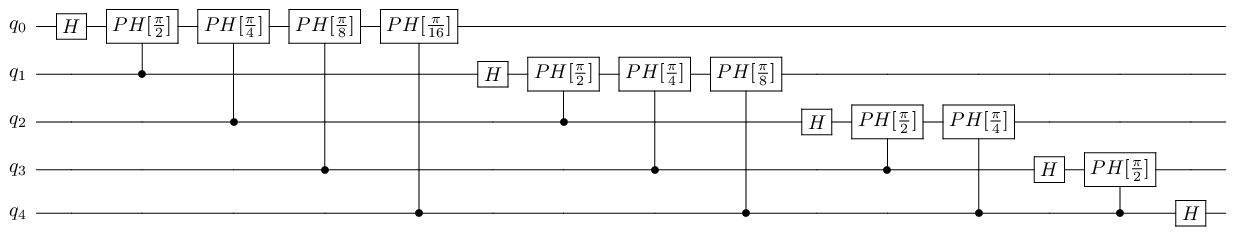

In [14]:
#Create a program
my_program = Program()

#Define the number of qubits
nbqubits = 5

#Allocate qubits
qubits = my_program.qalloc(nbqubits)

#Apply the QFT function
my_program.apply(QFT(nbqubits),qubits)

#Create the circuit
circuit = my_program.to_circ()

#Display the circuit
%qatdisplay circuit --depth 1

Once done you can simulate the circuit as before using the following cell:

In [13]:
 #Let us import some qpu connected to a classical linear algebra simulator
from qat.qpus import LinAlg
qpu = LinAlg()

#Create the job
job = circuit.to_job()

#Submit the job
results = qpu.submit(job)

#Print results
for sample in results:
    print("State",sample.state,"with amplitude",sample.amplitude)

State |00000> with amplitude (0.1767766952966368+0j)
State |00001> with amplitude (0.1767766952966368+0j)
State |00010> with amplitude (0.1767766952966368+0j)
State |00011> with amplitude (0.1767766952966368+0j)
State |00100> with amplitude (0.1767766952966368+0j)
State |00101> with amplitude (0.1767766952966368+0j)
State |00110> with amplitude (0.1767766952966368+0j)
State |00111> with amplitude (0.1767766952966368+0j)
State |01000> with amplitude (0.1767766952966368+0j)
State |01001> with amplitude (0.1767766952966368+0j)
State |01010> with amplitude (0.1767766952966368+0j)
State |01011> with amplitude (0.1767766952966368+0j)
State |01100> with amplitude (0.1767766952966368+0j)
State |01101> with amplitude (0.1767766952966368+0j)
State |01110> with amplitude (0.1767766952966368+0j)
State |01111> with amplitude (0.1767766952966368+0j)
State |10000> with amplitude (0.1767766952966368+0j)
State |10001> with amplitude (0.1767766952966368+0j)
State |10010> with amplitude (0.17677669529663

Notice that you can modify the number of qubits. Be gentle, you are not alone using the QLM today.